Optimal gamma value: 0.60 Mean dice = 0.7407


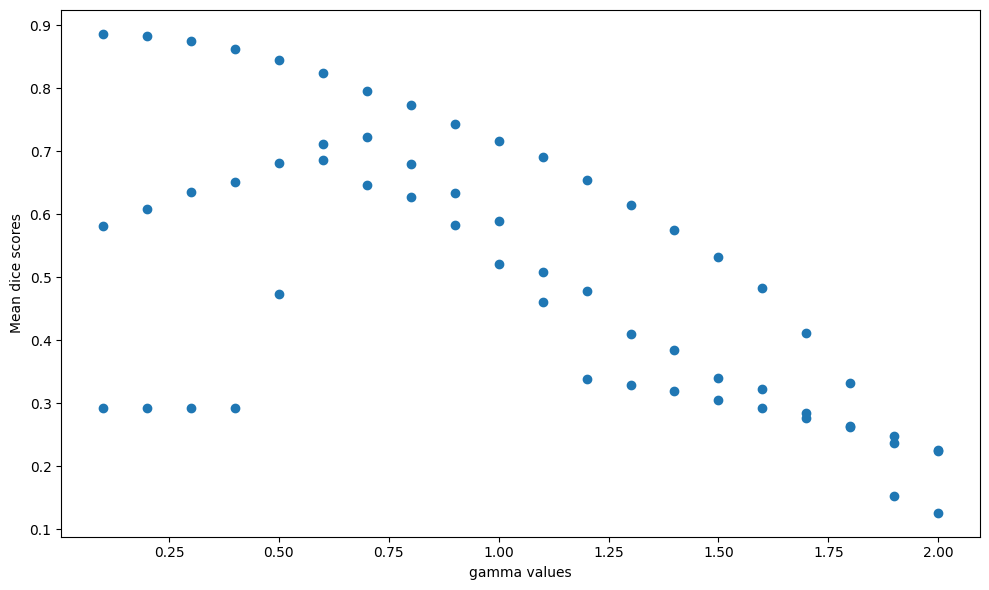

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------------
#PLOT FOR mean dice score in dependency of gamma values
#------------------------------------------------------


# Define indices for the labels of the later x-axis 
gamma_values = np.arange(-2.00, 2.01, 0.1)

x = np.concatenate((gamma_values, gamma_values, gamma_values))

# Load the Dice scores from Otsu-only into one array, and those from gamma-transformation into another
# Loading

NIH3T3_dice = np.load('Dice_scores/NIH3T3_dice_means_gamma.npy')

N2DL_HeLa_dice = np.load('Dice_scores/N2DL-HeLa_dice_means_gamma.npy')

N2DH_GOWT1_dice = np.load('Dice_scores/N2DH-GOWT1_dice_means_gamma.npy')
# Combining
all_dice_means_gamma = np.concatenate((NIH3T3_dice, N2DL_HeLa_dice, N2DH_GOWT1_dice))

# Find the best gamma value

# Combine all vectors into 2d array (Columns: the datasets, rows: the gamma values)
all_means = np.vstack([NIH3T3_dice, N2DL_HeLa_dice, N2DH_GOWT1_dice]).T

# Calculate the mean of each gamma value across all datasets (mean of rows)
mean_across_datasets = all_means.mean(axis=1)  # shape = (len(gamma_values),)

# Find the index of the maximum row mean
best_idx = np.argmax(mean_across_datasets)

# Use index to find the best gamma value
best_gamma = gamma_values[best_idx]
best_dice  = mean_across_datasets[best_idx]

print(f"Optimal gamma value: {best_gamma:.2f} Mean dice = {best_dice:.4f}")



# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x, all_dice_means_gamma)

plt.xlabel('gamma values')
plt.ylabel('Mean dice scores')
plt.title('')
plt.tight_layout()
plt.show()